In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis


# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup complete...")

Setup complete...


In [3]:
asd = pd.read_csv("Children_ASD.csv")
print("Dataset loaded...")

Dataset loaded...


In [4]:
asd.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years
count,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000
mean,1112.500000,0.432165,0.345463,0.311321,0.395777,0.403863,0.440252,0.504942,0.356244,0.371518,0.550764,4.320755
std,642.735171,0.495488,0.475626,0.463138,0.489127,0.490781,0.496529,0.500088,0.478996,0.483319,0.497528,2.736272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,556.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1112.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000
75%,1668.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,2225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [5]:
asd.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10_Autism_Spectrum_Quotient', 'Age_Years', 'Sex', 'Ethnicity',
       'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test',
       'ASD_traits'],
      dtype='object')

In [6]:
asd.drop(['Case_No', 'Who_completed_the_test'], axis = 1, inplace = True)
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10_Autism_Spectrum_Quotient', 'Age_Years', 'Sex', 'Ethnicity',
       'Jaundice', 'Family_mem_with_ASD', 'ASD_traits'],
      dtype='object')

In [7]:
asd.dtypes

A1                               int64
A2                               int64
A3                               int64
A4                               int64
A5                               int64
A6                               int64
A7                               int64
A8                               int64
A9                               int64
A10_Autism_Spectrum_Quotient     int64
Age_Years                        int64
Sex                             object
Ethnicity                       object
Jaundice                        object
Family_mem_with_ASD             object
ASD_traits                      object
dtype: object

In [8]:
corr = asd.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

ValueError: could not convert string to float: 'F'

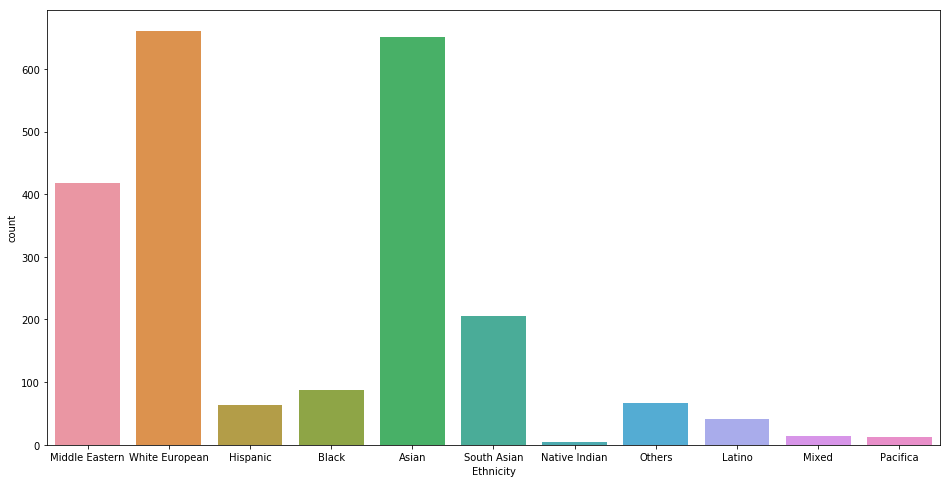

In [ ]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = asd)

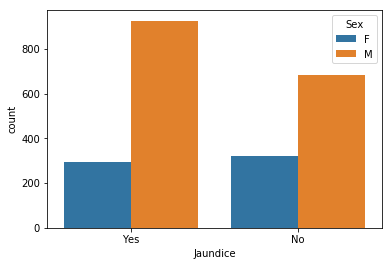

In [ ]:
sns.countplot(x = 'Jaundice', hue = 'Sex', data = asd)

In [ ]:
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10_Autism_Spectrum_Quotient', 'Age_Years', 'Sex', 'Ethnicity',
       'Jaundice', 'Family_mem_with_ASD', 'ASD_traits'],
      dtype='object')

In [12]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'ASD_traits', 'Sex', 'Jaundice']
for col in columns:
    asd[col] = le.fit_transform(asd[col])
asd.dtypes

A1                              int64
A2                              int64
A3                              int64
A4                              int64
A5                              int64
A6                              int64
A7                              int64
A8                              int64
A9                              int64
A10_Autism_Spectrum_Quotient    int64
Age_Years                       int64
Sex                             int32
Ethnicity                       int32
Jaundice                        int32
Family_mem_with_ASD             int32
ASD_traits                      int32
dtype: object

In [13]:
X = asd.drop(['ASD_traits'], axis = 1)
Y = asd['ASD_traits']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)

In [14]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))

models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    print(name, accuracy_score(y_test, pred))

LR 0.8654708520179372
LDA 0.8789237668161435
KNN 0.9260089686098655
CART 0.9596412556053812
NB 0.8789237668161435
SVM 0.9192825112107623
RF 0.7556053811659192
GBR 0.600896860986547
ABR 0.4977578475336323


**Tuning hyperparametres for SVC**

In [ ]:
svc = SVC()

params = {
    'C': [1.2,1.3,1.4,15],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(x_train, y_train)
clf.best_params_

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] C=1.2, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1.2, gamma=0.1, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................. C=1.2, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1.2, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1.2, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1.2, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1.2, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1.2, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1.2, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1.2, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:  2.5min finished


{'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
# Re-running model with best parametres
svc1 = SVC(C = 15, gamma = 0.1, kernel = 'rbf')
svc1.fit(x_train, y_train)
pred = svc1.predict(x_test)
print(accuracy_score(y_test, pred))

0.9708520179372198
